# Car Price Prediction Model

## Importing Libraries

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(10,4))

In [343]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

## Studying Data

In [4]:
df=pd.read_csv('quikr_car.csv')
df.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [10]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [11]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [18]:
df.fuel_type.value_counts()

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64

In [24]:
df.name.unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [23]:
df.company.unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [22]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [21]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [19]:
df.kms_driven.unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

## Backup Created

In [25]:
car_backup=df.copy()

In [108]:
df=car_backup.copy()

## Cleaning Data

In [109]:
df.columns, df.shape

(Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object'),
 (892, 6))

### Handling Date Column

In [110]:
df['year'].mode()

0    2015
Name: year, dtype: object

In [111]:
df['year']=np.where(df['year'].str.isnumeric(), df['year'], df['year'].mode())

In [112]:
df['year'].str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
887    True
888    True
889    True
890    True
891    True
Name: year, Length: 892, dtype: bool

In [113]:
df['year']=pd.to_datetime(df['year'])

In [223]:
df.year.max()

Timestamp('2019-01-01 00:00:00')

### Handling Price Column

In [115]:
df['Price'].str.replace(',','').str.isnumeric().value_counts()

Price
True     857
False     35
Name: count, dtype: int64

In [116]:
df['Price']=df['Price'].str.replace(',','')

In [124]:
df['Price'].sample(10)

778    300000
465     90000
774    240000
807         0
356    324999
323    649999
396     80000
335    210000
452    395000
25     100000
Name: Price, dtype: object

In [122]:
df['Price']=np.where(df['Price']=='Ask For Price',0 , df['Price'])

In [126]:
df['Price']=np.where(df['Price'].str.isnumeric(), df['Price'].astype(int), 0)

In [131]:
df['Price']=np.where(df['Price']==0, df['Price'].median(), df['Price'])

### Fresh DF Copy Saved

In [133]:
fine_df= df.copy()

In [172]:
df= fine_df.copy()

### Handling KMs_Driven and Fuel column

In [173]:
df['kms_driven']= df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [174]:
df['kms_driven'].str.isnumeric().value_counts()

kms_driven
True     838
False      2
Name: count, dtype: int64

In [176]:
df['kms_driven']= np.where(df['kms_driven'].str.isnumeric(), df['kms_driven'], np.nan )

In [182]:
df['kms_driven']= np.where(df['kms_driven'].isna(), 0.0, df['kms_driven'].astype(float) )

In [186]:
df['kms_driven']= np.where(df['kms_driven']==0, df['kms_driven'].median(), df['kms_driven'])

In [185]:
df['kms_driven'].mean(), df['kms_driven'].mode(), df['kms_driven'].median()

(43225.158071748876,
 0    0.0
 Name: kms_driven, dtype: float64,
 39000.0)

In [187]:
df['kms_driven'].isna().value_counts()

kms_driven
False    892
Name: count, dtype: int64

In [189]:
df['fuel_type'].isna().value_counts()

fuel_type
False    837
True      55
Name: count, dtype: int64

In [190]:
df['fuel_type_imputed']= df['fuel_type']

In [192]:
df['fuel_type_imputed'][df['fuel_type_imputed'].isnull()] = df['fuel_type'].dropna().sample(df['fuel_type'].isnull().sum()).values

C:\Users\abhin\AppData\Local\Temp\ipykernel_13340\2362399428.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['fuel_type_imputed'][df['fuel_type_imputed'].isnull()] = df['fuel_type'].dropna().sample(df['fuel_type'].isnull().sum()).valu

In [193]:
df['fuel_type_imputed'].isna().value_counts()

fuel_type_imputed
False    892
Name: count, dtype: int64

In [201]:
df['fuel_type']= df['fuel_type_imputed']
df.drop(columns=['fuel_type_imputed'], inplace=True)

In [202]:
df['fuel_type'].isna().sum()

0

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        892 non-null    object        
 1   company     892 non-null    object        
 2   year        892 non-null    datetime64[ns]
 3   Price       892 non-null    float64       
 4   kms_driven  892 non-null    float64       
 5   fuel_type   892 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 41.9+ KB


### Handling Car Name

In [204]:
df['name']= df['name'].str.split(" ").str.slice(0,3).str.join(' ')

In [207]:
df=df.reset_index(drop=True)

### Fresh DF Copy Made

In [209]:
fine_df= df.copy()

## Handling Outliers

In [299]:
df.describe()

,year,Price,kms_driven
count,892,8.920000e+02,892.000000
mean,2012-08-30 09:04:02.152466432,3.999922e+05,45935.920404
min,1995-01-01 00:00:00,3.000000e+04,5.000000
25%,2011-01-01 00:00:00,1.787500e+05,28550.000000
50%,2014-01-01 00:00:00,2.849998e+05,39000.000000
75%,2015-01-01 00:00:00,4.750000e+05,55000.000000
max,2019-01-01 00:00:00,8.500003e+06,400000.000000
std,NaN,4.568934e+05,33174.576158


In [300]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

<Axes: xlabel='kms_driven'>

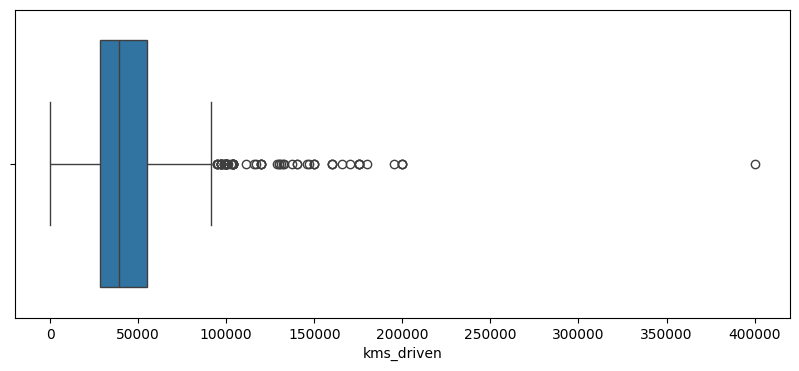

In [301]:
sns.boxplot(df['kms_driven'], orient="h")

In [302]:
km_out=df['kms_driven'].max()
df=df[(df['kms_driven']<km_out)].reset_index(drop=True)

<Axes: xlabel='Price'>

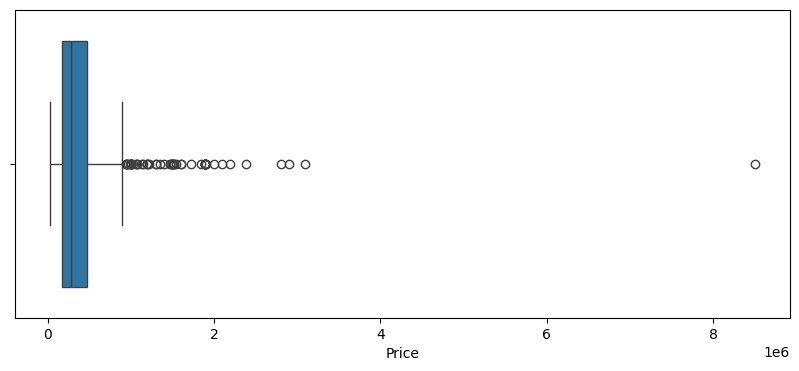

In [303]:
sns.boxplot(df['Price'], orient="h")

In [304]:
p_out=df['Price'].max()
df=df[(df['Price']<p_out)].reset_index(drop=True)
df.shape

(890, 6)

<Axes: xlabel='kms_driven'>

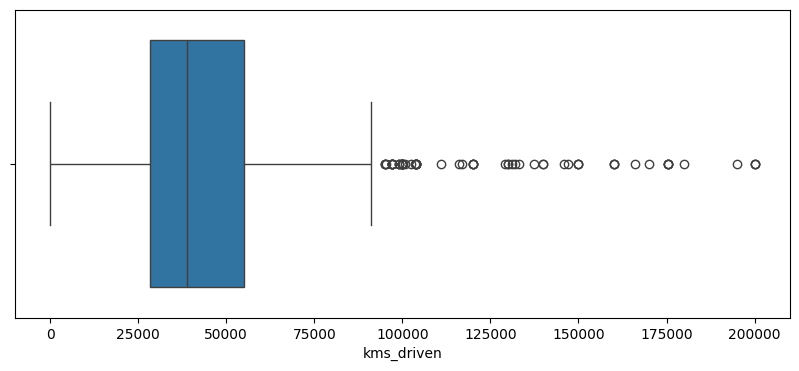

In [305]:
sns.boxplot(df['kms_driven'], orient="h")

<Axes: xlabel='Price'>

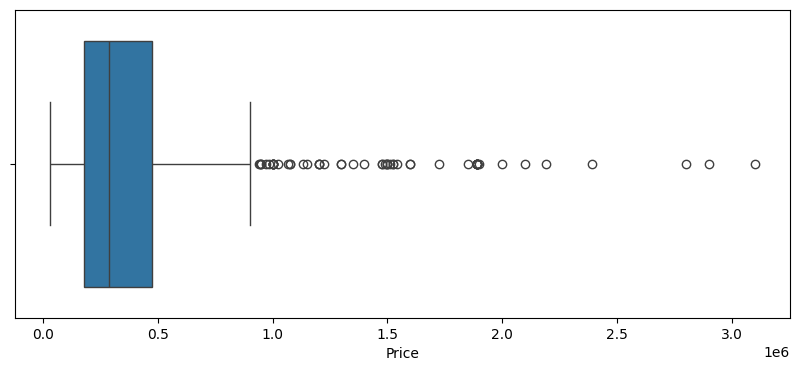

In [306]:
sns.boxplot(df['Price'], orient="h")

### Saving a Fresh Copy to CSV

In [250]:
df.to_csv('Cleaned_Car_Data.csv')

## Model

In [326]:
x=df.drop(columns=['Price'])
y=df['Price']

In [327]:
x.reset_index(drop=True)

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007-01-01,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006-01-01,40.0,Diesel
2,Maruti Suzuki Alto,Maruti,2018-01-01,22000.0,Petrol
3,Hyundai Grand i10,Hyundai,2014-01-01,28000.0,Petrol
4,Ford EcoSport Titanium,Ford,2014-01-01,36000.0,Diesel
...,...,...,...,...,...
885,Ta,Tara,2015-01-01,39000.0,Diesel
886,Tata Zest XM,Tata,2018-01-01,27000.0,Diesel
887,Mahindra Quanto C8,Mahindra,2013-01-01,40000.0,Diesel
888,Honda Amaze 1.2,Honda,2014-01-01,39000.0,Diesel


In [328]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        890 non-null    object        
 1   company     890 non-null    object        
 2   year        890 non-null    datetime64[ns]
 3   kms_driven  890 non-null    float64       
 4   fuel_type   890 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 34.9+ KB


In [329]:
x['name'] = x['name'].astype(str)
x['company'] = x['company'].astype(str)
x['fuel_type'] = x['fuel_type'].astype(str)
x['kms_driven'] = x['kms_driven'].astype(float)  # Convert to float if needed for scaling
x['year'] = x['year'].dt.year
x['year'] = x['year'].astype(int)

In [339]:
train_df, test_df, train_target, test_target= train_test_split(x,y, test_size=0.20, random_state=563)

encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(x[['name', 'company', 'fuel_type']])

colm_trf= make_column_transformer((OneHotEncoder(categories= encoder.categories_),['name', 'company', 'fuel_type']), 
                                  (StandardScaler(), ['kms_driven']),
                                  remainder='passthrough')

model=LinearRegression()

pipe=make_pipeline(colm_trf, model)

In [338]:
scores=[]
for i in range(1000):
    train_df, test_df, train_target, test_target= train_test_split(x,y, test_size=0.20, random_state=i)
    model= LinearRegression()
    pipe=make_pipeline(colm_trf, model)
    pipe.fit(train_df,train_target)
    pred= pipe.predict(test_df)
    scores.append(r2_score(test_target,pred))
np.argmax(scores)

563

In [340]:
pipe.fit(train_df, train_target)

c:\Users\abhin\.conda\envs\test1\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['2012 Tata Sumo', '7 SEATER MAHINDRA', '9 SEATER MAHINDRA',
       'Any type car', 'Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0',
       'Audi A6 2.0', 'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7',
       'BMW 3 Series', 'BMW 5 Series', 'BMW 7 Series', 'BMW X1',...
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Sale',
       'Skoda', 'Swift', 'TATA', 'Tara', 'Tata', 'Toyota', 'URJENT',
       'Used', 'Volkswagen', 'Volvo', 'Well', 'Yamaha', 'all', 'i',
       'scratch', 'sell', 'selling', 'tata', 'urgent', 'very'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['kms_driven'])])),
                ('linearregression', LinearRegression())])

In [341]:
pred= pipe.predict(test_df)

In [342]:
r2_score(test_target,pred)

0.8631256243470792

In [344]:
pickle.dump(pipe, open('Car_Predictor.pkl', 'wb'))